In [1]:
import numpy as np
import numpy.linalg as npl
import matplotlib.pyplot as plt

import import_ipynb
import Polynome2p1 as Poly
import Fonctions_Test as FT

importing Jupyter notebook from Polynome2p1.ipynb
importing Jupyter notebook from Fonctions_Test.ipynb


## Initialisation

In [2]:
def test_init(p):
    X = Poly.init_X(p)
    plt.plot(X[:p+1],np.ones(len(X[:p+1])),'ob')
    plt.plot(X[p+1:],np.ones(len(X[p+1:])),'or')

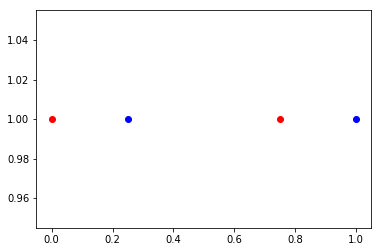

In [3]:
p = 1
test_init(p)

## Operateur S

In [4]:
def test_S(a):
    print(a)
    Speps = Poly.S(4,0.1,a)
    print(Speps)

    plt.plot(Speps[:4],np.ones(4),'or')
    plt.plot(Speps[4:],np.ones(4),'ob')

[0.1, 0.35, 0.5, 0.8, 0.07, 0.39, 0.65, 0.85]
[0.17391304 0.39130435 0.56521739 0.82608696 0.16949153 0.44067797
 0.66101695 0.83050847]


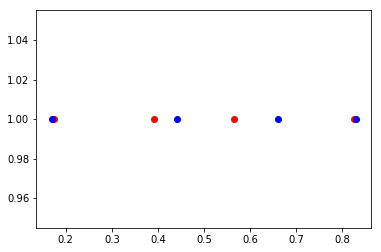

In [5]:
a = [0.1,0.35,0.5,0.8,0.07,0.39,0.65,0.85]
test_S(a)

## Erreur par les trapèzes

In [6]:
def test_erreurs_trapezes(fx,attendu,x=None):
    print("Obtenu : ", Poly.trapezes(fx,x=x,h=1))
    print("Attendu : ",attendu)

x = np.linspace(0,1,5)
fx = np.array([0,1,3,3,2])
attendu = np.sqrt(0.25*0.5 + 0.25*5 + 9*0.25 + 0.25*6.5)
test_erreurs_trapezes(fx,attendu)

Obtenu :  2.29128784747792
Attendu :  2.29128784747792


# Algorithme

In [7]:
def test_approx(p,f,h,epsilon,affichage=None,s=None,ResidusNewton=None):
    x = np.linspace(0,1,1000001)
    px, param_interpol,nb_iter = Poly.approxh(x,p,f,h,epsilon,s=s,ResidusNewton=ResidusNewton)

    interp, a_alpha,b_beta = param_interpol
    Ap = a_alpha(p,f,h,interp[:p+1],interp,epsilon)
    Bp = b_beta(p,f,h,interp[p+1:],interp,epsilon)
    
    fx = f(x,h) 

    if affichage != None and affichage != 0 : 
        plt.plot(x,fx,label="f(x)")
        plt.plot(x,px,label="p(x)")
        plt.plot(interp,f(interp,h),'ob')
        plt.plot(interp, Poly.pn(interp,Ap,Bp),'+r')
        plt.legend()
        name = str(f).split(' ')[1]
        plt.title(name+", p = "+str(p)+", h = "+str(h)+", epsilon = "+str(epsilon))
        plt.savefig("./Images/Test/eps/"+name+", p = "+str(p)+", h = "+str(h)+", epsilon = "+str(epsilon)+".eps", format='eps')
        plt.savefig("./Images/Test/png/"+name+", p = "+str(p)+", h = "+str(h)+", epsilon = "+str(epsilon)+".png", format='png')
        plt.show()
    
    return px,fx,nb_iter

### Test sur des fonctions classiques 

#### Cas spécial : la constante

Nb iter : 
 1
Residus :
 2.220446049250313e-16


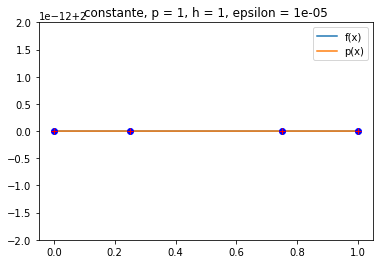

Erreur : 
         4.696369900143234e-13
         1.7763568394002505e-15
         4.696367800499602e-16


In [8]:
def constante(x,h):
    x = x*h
    return 0*x +2

p = 1
h  = 1
epsilon = 1e-05

px,fx,nb_iter = test_approx(p,constante,h,epsilon,1,1,1)
print("Erreur : ")
print(" "*8,npl.norm(px-fx))
print(" "*8,npl.norm(px-fx,np.inf))
print(" "*8,Poly.trapezes(px-fx,h))

#### Cas de fonctions definies "classiques" (cf. fichier Fonctions_Test)

Nb iter : 
 4
Residus :
 5.698858664392961e-13


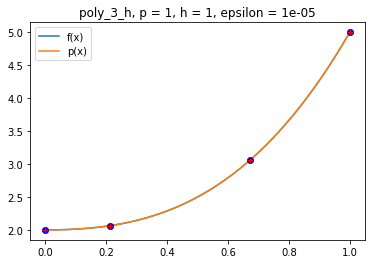

Nombre d'iterations : 4
Norme de l'erreur : 
    n2 = 2.3675973297863027e-09
    ninf =  3.788969138440734e-12
    trapezes =  2.3675973297862878e-12 



In [9]:
h = 1
p = 1
epsilon=1e-5
fonctions_test = FT.fonctions("Sans Arg","Classic")[:1]

for fonctions in fonctions_test : 
    px,fx,nb_iter = test_approx(p,fonctions,h,epsilon,affichage=1,s=1,ResidusNewton=1)
    print("Nombre d'iterations :", nb_iter)
    print("Norme de l'erreur : ")
    print("    n2 =", npl.norm(px-fx))
    print("    ninf = ", npl.norm(px-fx,np.inf))
    print("    trapezes = ", Poly.trapezes(px-fx,h=h),"\n")

#### Cas de fonctions moins classiques (cf fichier Fonctions_Test)

Nb iter : 
 10
Residus :
 4.86988543826935e-13


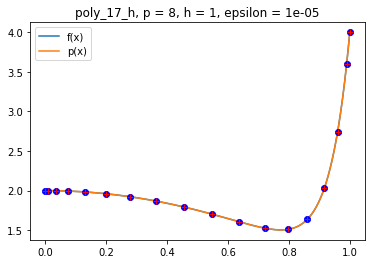

Nombre d'iterations : 10
Norme de l'erreur : 
    n2 = 1.1051045974638759e-09
    ninf =  4.39470682067622e-12
    trapezes =  1.105104597463866e-12 



In [10]:
h = 1
p = 8
epsilon=1e-5
fonctions_test = FT.fonctions("Sans Arg")[:1]

for fonctions in fonctions_test : 
    px,fx,nb_iter = test_approx(p,fonctions,h,epsilon,affichage=1,s=1,ResidusNewton=1)
    print("Nombre d'iterations :", nb_iter)
    print("Norme de l'erreur : ")
    print("    n2 =", npl.norm(px-fx))
    print("    ninf = ", npl.norm(px-fx,np.inf))
    print("    trapezes = ", Poly.trapezes(px-fx,h=h),"\n")

### Erreur algo Newton

Nb iter : 
 9
Residus :
 6.866397907988807e-13


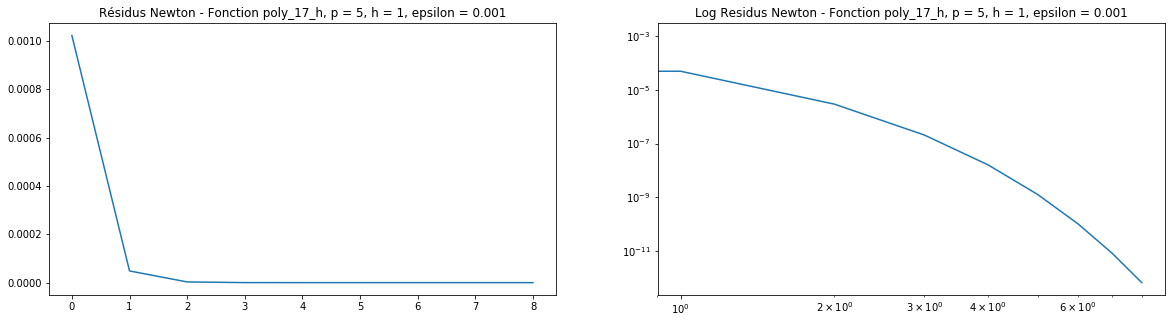

In [11]:
h = 1
epsilon=0.001
p = 5

for fonctions in fonctions_test : 
    px,fx,nb_iter = test_approx(p,fonctions,h,epsilon,0,0,2)

## Mise en évidence de la modification du polynome interpolant au fil des itérations

In [15]:
## Mise en évidence de la modification du polynome interpolant au fil des itérations

def affiche(X,f,h,p,title,fich):
    x = np.linspace(0,1,501)
    Ap = Poly.a_alpha(p,f,h,X[:p+1],x,epsilon)
    Bp = Poly.b_beta(p,f,h,X[p+1:],x,epsilon)
    px = Poly.pn(x,Ap,Bp)
    
    ap = Poly.a_alpha(p,f,h,X[:p+1],X,epsilon)
    bp = Poly.b_beta(p,f,h,X[p+1:],X,epsilon)
    pt = Poly.pn(X,ap,bp)
    
    fx = f(x,h)
 
    plt.plot(x,fx,label="f(x)")
    plt.plot(x,px,label="p_n(x)")
    plt.plot(X,pt,"o",label="nodes")
    plt.title(title)
    #plt.savefig("./Images/"+fich+".eps",format='eps')
    plt.show()

def Newton_Raphson (X0,p,f,h,epsilon,s=None,eps=1e-8,itermax=100):
    # reconstruit le polynome le plus interpolant
    epsi = Poly.epsi_S(p)
    #initialisation
    Xjac = np.copy(X0) 
    Xjac = np.concatenate((Xjac[:p],Xjac[p+2:]))
    X = np.copy(Xjac)
    X_test = np.copy(X0)
    k=0
    err=2*eps
    Residus = []
    #X_hist = [X0]
    while itermax > k and err > eps :
        name  = "Fonction poly_4_h p="+str(p)+" h="+str(h)+" epsilon="+str(epsilon)+"\nAt iteration"+str(k)
        name2 = "Fonction poly_4_h p="+str(p)+" h="+str(h)+" epsilon="+str(epsilon)+"it="+str(k)
        if k == 0 :
            affiche(X_test,f,h,p,name,name2)
        d = npl.solve(Poly.Jp(p,f,h,Xjac,epsilon),Poly.f_theta(X,p,f,h,epsilon))
        X = X - d
        if s != None and s != 0 :
            X = Poly.S(p,epsi,X)
        k+=1
        X_test = np.concatenate(( X[:p],[1],[0],X[p:]))
        fx = f(X_test,h)
        ap = Poly.a_alpha(p,f,h,X_test[:p+1],X_test,epsilon)
        bp = Poly.b_beta(p,f,h,X_test[p+1:],X_test,epsilon)
        px = Poly.pn(X_test,ap,bp)
        err = npl.norm(fx-px)/npl.norm(fx) #npl.norm(X-X0)/npl.norm(X0)
        Residus += [err]
        if np.any(1<=X) or np.any(X<=0):
            raise ValueError
        
    affiche(X_test,f,h,p,name,name2)
    return X,k,Residus

def approxh(x,p,f,h,epsilon,init=None,s=None,ResidusNewton=None): 
    X0 = Poly.init_X(p)
    X,itermax,residus = Newton_Raphson(X0,p,f,h,epsilon,s)
    X  = np.concatenate(( X[:p],[1],[0],X[p:]))
    ap = Poly.a_alpha(p,f,h,X[:p+1],x,epsilon)
    bp = Poly.b_beta(p,f,h,X[p+1:],x,epsilon)
    
    return Poly.pn(x,ap,bp),[X,Poly.a_alpha,Poly.b_beta],itermax,X0

def test_approx(p,f,h,epsilon,affichage=None,s=None,ResidusNewton=None):
    x = np.linspace(0,1,100_001)
    px, param_interpol,nb_iter,X0 = approxh(x,p,f,h,epsilon,s=s,ResidusNewton=ResidusNewton)

    #interp, a_alpha,b_beta = param_interpol
    #Ap = a_alpha(p,f,h,interp[:p+1],interp,epsilon)
    #Bp = b_beta(p,f,h,interp[p+1:],interp,epsilon)
    
    Ap = Poly.a_alpha(p,f,h,X0[:p+1],x,epsilon)
    Bp = Poly.b_beta(p,f,h,X0[p+1:],x,epsilon)
    
    fx = f(x,h) 

    if affichage != None and affichage != 0 : 
        plt.plot(x,fx,label="f(x)")
        plt.plot(x,px,label="p(x) (last iter)")
        #plt.plot(interp,f(interp,h),'ob')
        #plt.plot(interp, pn(interp,Ap,Bp),'+r')
        plt.plot(x,Poly.pn(x,Ap,Bp),label="p(x) (first iter)")
        #plt.plot(X0,np.zeros(len(X0)),'+')
        plt.legend()
        name = str(f).split(' ')[1]
        plt.title(name+", p = "+str(p)+", h = "+str(h)+", epsilon = "+str(epsilon))
        plt.savefig("./Images/EtudesParamOpe/Parametres/"+affichage+"/eps/"+name+", p = "+str(p)+", h = "+str(h)+", epsilon = "+str(epsilon)+".eps", format='eps')
        plt.savefig("./Images/EtudesParamOpe/Parametres/"+affichage+"/png/"+name+", p = "+str(p)+", h = "+str(h)+", epsilon = "+str(epsilon)+".png", format='png')
        plt.show()
    
    return px,fx,nb_iter

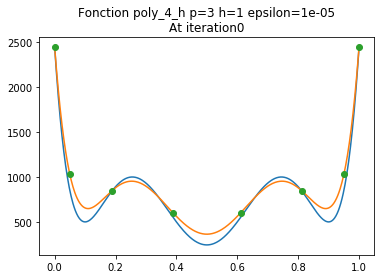

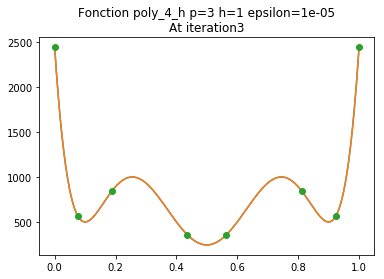

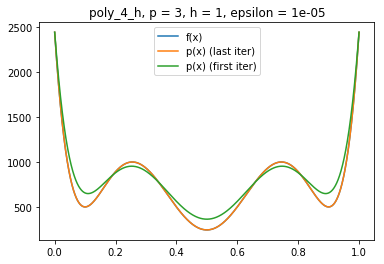

In [19]:
def poly_4_h(x,h):
    x = (x-0.5)*h
    x = x*10
    return (x-4)**2*(x-1)*(x+1)*(x+4)**2 + 500

p = 3
h  = 1
epsilon = 1e-5
Err = np.zeros(3)
f = poly_4_h

#for i in range(len(p)):
px,fx,nb_iter = test_approx(p,f,h,epsilon,"effetGibbs",1)
Err[0] = npl.norm(px-fx)
Err[1] = npl.norm(px-fx,np.inf)
Err[2] = Poly.trapezes(px-fx,h=h)

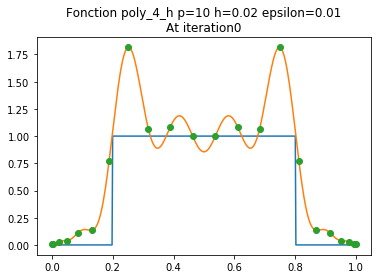

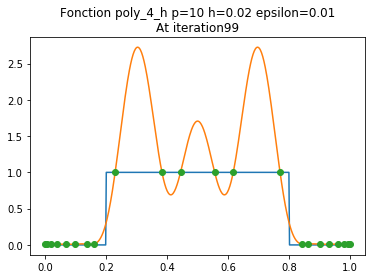

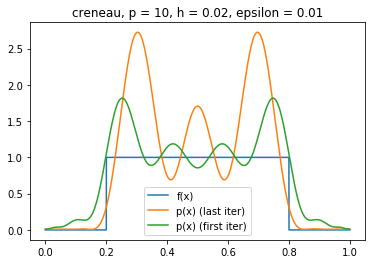

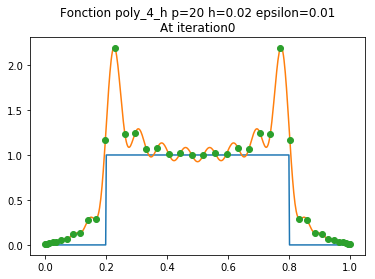

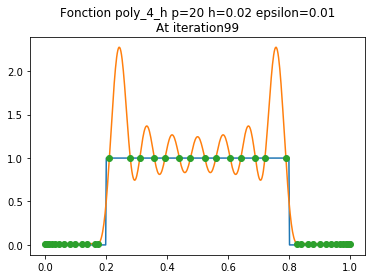

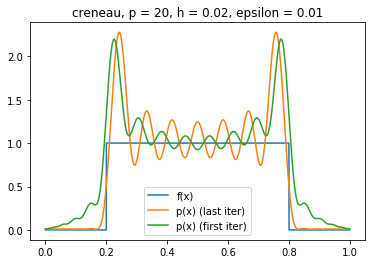

In [20]:
def creneau(x,h):
    x = x*h
    return (x<0.2*h)*0 + (x>0.8*h)*0 + (0.2*h<=x)*(x<=0.8*h)*1 

p = [10,20] #
h  = 0.02
epsilon = 1e-2
Err = np.zeros((3,len(p)))
#creneau = FT.creneau_h

for i in range (len(p)):
    px,fx,nb_iter = test_approx(p[i],creneau,h,epsilon,"effetGibbs",1)
    Err[0,i] = npl.norm(px-fx)
    Err[1,i] = npl.norm(px-fx,np.inf)
    Err[2,i] = Poly.trapezes(px-fx,h=h)


# Test pour fonctions avec arguments

In [21]:
import Polynome2p1_avecArgumentsF as Poly_Arg 

importing Jupyter notebook from Polynome2p1_avecArgumentsF.ipynb


In [22]:
def test_approx(p,f,h,argf,epsilon,affichage=None,s=None):
    x = np.linspace(0,1,1000001)
    px, param_interpol,nb_iter = Poly_Arg.approxh(x,p,f,h,argf,epsilon,s=s)


    interp, a_alpha,b_beta = param_interpol
    Ap = a_alpha(p,f,h,argf,interp[:p+1],interp,epsilon)
    Bp = b_beta(p,f,h,argf,interp[p+1:],interp,epsilon)
    
    fx = f(x,h,*argf) 
    
    if affichage != None or affichage != 0 : 
        plt.plot(x,fx,label="f(x)")
        plt.plot(x,px,label="p(x)")
        plt.plot(interp,f(interp,h,*argf),'ob')
        plt.plot(interp, Poly_Arg.pn(interp,Ap,Bp),'+r')
        plt.legend()
        name = str(f).split(' ')[1]
        plt.title("Fonction "+name+", p = "+str(p)+", h = "+str(h)+", epsilon = "+str(epsilon))
        plt.savefig("./Images/Test/eps/"+name+", p = "+str(p)+", h = "+str(h)+", epsilon = "+str(epsilon)+".eps", format='eps')
        plt.savefig("./Images/Test/png/"+name+", p = "+str(p)+", h = "+str(h)+", epsilon = "+str(epsilon)+".png", format='png')
        plt.show()
    
    return px,fx,nb_iter

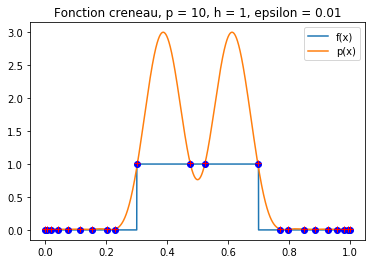

In [23]:
def creneau(x,h,o):
    x = x*h+o
    return (x>0.3)*(x<0.7)*1

p = 10
h  = 1
arg = [0]
epsilon = 1e-2
#creneau = FT.creneau_h

px,fx,nb_iter = test_approx(p,creneau,h,arg,epsilon,"effetGibbs",1)

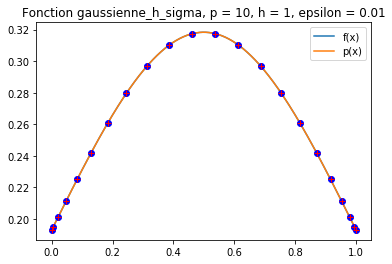

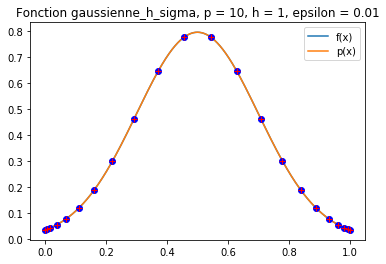

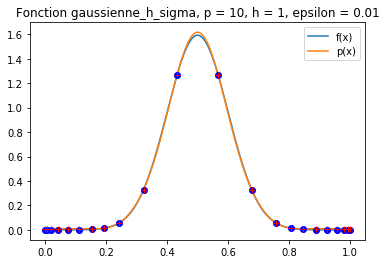

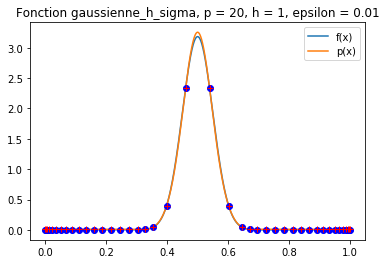

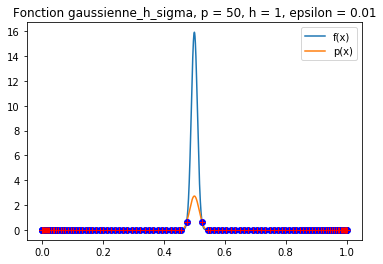

In [24]:
h = 1
p = [10,10,10,20,50]
epsilon=0.01
l = [[1/2],[1/5],[1/10],[1/20],[1/100]]
fonctions = FT.fonctions("Avec Arg")
Err = np.zeros((2,len(l)))

for i in range(len(l)):
    px,fx,nb_iter = test_approx(p[i],fonctions[0],h,l[i],epsilon,1)
    Err[0,i] = npl.norm(px-fx)
    Err[1,i] = npl.norm(px-fx,np.inf)
    
#plt.plot(Err[0,:],label="Norme 2")
#plt.plot(Err[1,:],label="Norme inf")
#plt.legend()

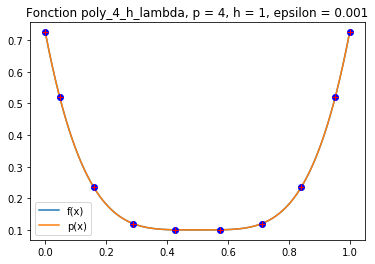

Nb iter :  17


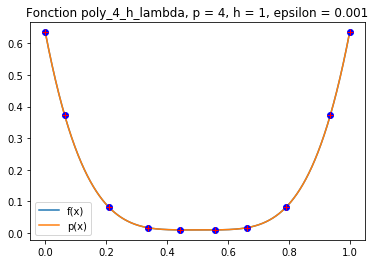

Nb iter :  40


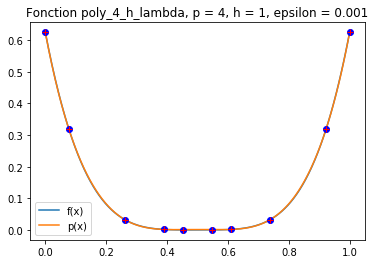

Nb iter :  500


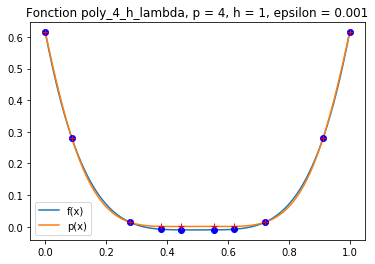

Nb iter :  500


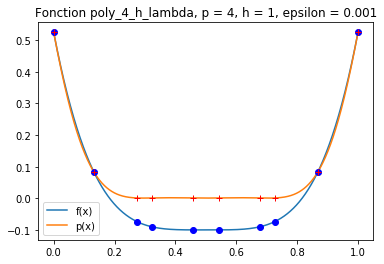

Nb iter :  500


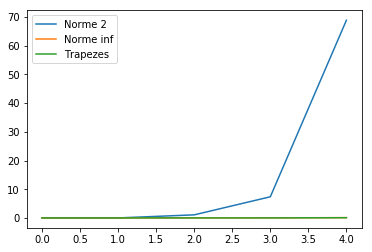

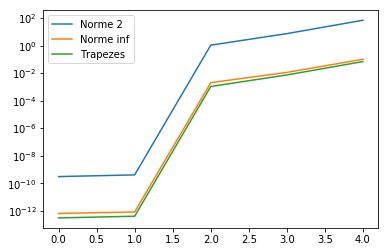

In [25]:
h = 1
p = 4
epsilon=1e-3
l = [[0.1],[0.01],[0],[-0.01],[-0.1]]
fonctions = FT.fonctions("Avec Arg")
Err = np.zeros((3,len(l)))

for i in range(len(l)):
    px,fx,nb_iter = test_approx(p,fonctions[1],h,l[i],epsilon,1,1)
    Err[0,i] = npl.norm(px-fx)
    Err[1,i] = npl.norm(px-fx,np.inf)
    Err[2,i] = Poly_Arg.trapezes(px-fx,h=h)
    print("Nb iter : ", nb_iter)
    

plt.plot(Err[0,:],label="Norme 2")
plt.plot(Err[1,:],label="Norme inf")
plt.plot(Err[2,:],label="Trapezes")
plt.legend()
plt.show()
plt.semilogy(Err[0,:],label="Norme 2")
plt.semilogy(Err[1,:],label="Norme inf")
plt.semilogy(Err[2,:],label="Trapezes")
plt.legend()


Remarque : par rapport au papier diff pour le n=9, lambda = -0.1